In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
wine_data = pd.read_csv('winemag-data-130k-v2.csv')

In [4]:
wine_data = pd.read_csv('winemag-data-130k-v2.csv')
print(wine_data.head(5))
print(wine_data.tail(5))
print(wine_data.info())
print(wine_data.describe())
print(wine_data.isnull().sum())

   Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0              

In [5]:
print(wine_data.columns)

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')


In [6]:
points = wine_data['points']
mu = points.mean()
sigma = points.std(ddof=0)
print("mu: ", mu, ", sigma:", sigma)

mu:  88.44713820775404 , sigma: 3.0397185090150947


In [8]:
z_critical = 1.96 # alpha level of 0.05 and two-tailed test
x_bar = 90.2
N = 10
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

1.8235358539097541


In [9]:
N = 30
SE = sigma/np.sqrt(N)
z_stat = (x_bar - mu)/SE
print(z_stat)

3.158456748395192


In [10]:
x = np.random.normal(loc = 9.2, scale = 1.5, size=30).round(1)
print(x)

[ 7.7  6.7  5.6 10.   9.6 12.3 10.  13.1  8.2 10.7  6.4  8.9  9.4  7.7
  9.  11.2  9.5  7.4  8.   9.2  9.7  9.2 10.4  7.7  9.7 11.1  8.   8.3
 10.6  9.2]


In [12]:
x = [8.8, 6.6, 9.5, 11.2, 10.2, 7.4, 8.0, 9.6, 9.9, 9.0,
     7.6, 7.4, 10.4, 11.1, 8.5, 10.0, 11.6, 10.7, 10.3, 7.0]
mu = 10
t_critical = 2.093
x_bar = np.array(x).mean()
s = np.array(x).std(ddof=1) # subtract 1 from N to get unbiased estimate of sample standard deviation
N = len(x)
SE = s/np.sqrt(N)
t = (x_bar - mu)/SE
print("t-statistic: ",t)

# a one sample t-test that gives you the p-value too can be done with scipy as follows:
t, p = stats.ttest_1samp(x, mu)
print("t = ", t, ", p = ", p)

t-statistic:  -2.2491611580763977
t =  -2.2491611580763973 , p =  0.03655562279112415


In [13]:
# margin of error

err = t_critical*SE
x_low = x_bar - err
x_high =x_bar + err

print("CI using scipy: ", stats.t.interval(0.95, N-1, loc=x_bar, scale = SE))

CI using scipy:  (8.532759313560822, 9.947240686439175)


In [14]:
# sample up wind
x1 = [10.8, 10.0, 8.2, 9.9, 11.6, 10.1, 11.3, 10.3, 10.7, 9.7, 
      7.8, 9.6, 9.7, 11.6, 10.3, 9.8, 12.3, 11.0, 10.4, 10.4]

# sample down wind
x2 = [7.8, 7.5, 9.5, 11.7, 8.1, 8.8, 8.8, 7.7, 9.7, 7.0, 
      9.0, 9.7, 11.3, 8.7, 8.8, 10.9, 10.3, 9.6, 8.4, 6.6,
      7.2, 7.6, 11.5, 6.6, 8.6, 10.5, 8.4, 8.5, 10.2, 9.2]

# equal sample size and assume equal population variance
t_critical = 1.677
N1 = len(x1)
N2 = len(x2)
d1 = N1-1
d2 = N2-1
df = d1+d2
s1 = np.std(x1,ddof=1)
s2 = np.std(x2,ddof=1)
x1_bar = np.mean(x1)
x2_bar = np.mean(x2)

sp = np.sqrt((d1*s1**2 + d2*s2**2)/df)
se = sp*np.sqrt(1/N1 + 1/N2)
t = (x2_bar - x1_bar)/(se)
print("t-statistic", t)

# a two-sample independent t-test is done with scipy as follows
# NOTE: the p-value given is two-sided so the one-sided p value would be p/2
t, p_twosided = stats.ttest_ind(x2, x1, equal_var=True)
print("t = ",t, ", p_twosided = ", p_twosided, ", p_onesided =", p_twosided/2)

t-statistic -3.5981947686898033
t =  -3.5981947686898033 , p_twosided =  0.0007560337478801464 , p_onesided = 0.0003780168739400732


Confidence Interval:
x2_bar - x1_bar =  -1.3350000000000026 , 95% CI  (-2.0809844644533113, -0.589015535546694)
Cohen's Effect Size, d:
d =  -1.0387093591498806
r_squared =  0.21243054465702976
r_squared =  0.21243054465702918


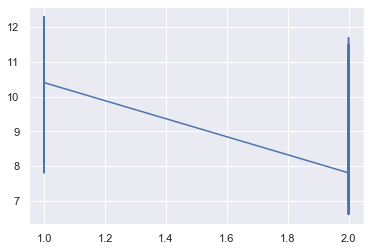

In [15]:
print("Confidence Interval:")
print("x2_bar - x1_bar = ", x2_bar - x1_bar, ", 95% CI ",stats.t.interval(0.95, df, loc=x2_bar-x1_bar, scale=se))
print("Cohen's Effect Size, d:")
print("d = ", (x2_bar - x1_bar)/sp)

rsq = t**2 / (t**2 + df)
print("r_squared = ", rsq) 

# notice that the r_squared value above is equal to the r_squared value you would get from linear regression
x = np.concatenate((np.ones(N1), np.ones(N2)*2))
y = np.concatenate((x1,x2))

slope, yint, r, p, sterr = stats.linregress(x, y)
print("r_squared = ",r**2)

plt.plot(x,y)
plt.show()

In [16]:
# sample before conversion to nat. gas
x1 = np.array([10.8, 6.4, 8.3, 7.6, 11.4, 9.9, 10.6, 8.7, 8.1, 10.9,
      11.0, 11.8, 7.3, 9.6, 9.3, 9.9, 9.0, 9.5, 10.6, 10.3,
      8.8, 12.3, 8.9, 10.5, 11.6, 7.6, 8.9, 10.4, 10.2, 8.8])
# sample after conversion to nat. gas
x2 = np.array([10.1, 6.9, 8.6, 8.8, 12.1, 11.3, 12.4, 9.3, 9.3, 10.8,
      12.4, 11.5, 7.4, 10.0, 11.1, 10.6, 9.4, 9.5, 10.0, 10.0,
      9.7, 13.5, 9.6, 11.6, 11.7, 7.9, 8.6, 10.8, 9.5, 9.6])
N = len(x2)
xbar_diff = np.mean(x2) - np.mean(x1) # could also do np.mean(x2 - x1))
sdiff = np.std(x2-x1,ddof=1)
t = xbar_diff / (sdiff/np.sqrt(N))
print("t = ", t)

t, p = stats.ttest_rel(x2, x1) # using scipy
print("t = ", t, ", p = ", p/2) # divide by two because we are doing a one-tail test

d = xbar_diff / sdiff
print("d = ", d) # chohen's d

t =  3.9054390813265063
t =  3.905439081326491 , p =  0.0002584344912342189
d =  0.7130323606015934
